<a href="https://colab.research.google.com/github/didi-d92/Bank-Marketing-Campaign-Analysis-and-Prediction/blob/main/1Logistic_regretion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión lógistica

El objetivo del proyecto es predecir si la persona va a contrartar el servicio

---

o no representado por deposit yes or no

#Uploading data

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [91]:
bank_data= pd.read_csv('/content/bank.csv')

In [92]:
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


Creo una copia el data frame como buena práctica ante cualquier eventualidad

In [93]:
data= bank_data.copy()

#Limpieza de datos

In [94]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [96]:
data.shape

(11162, 17)

Data duplicada

In [97]:
filas_duplicadas= data.duplicated().sum()

In [98]:
print(f'Total de filas duplicadas: {filas_duplicadas}')

Total de filas duplicadas: 0


In [99]:
datos_nulos= data.isnull().sum()

In [100]:
print(f'Total de información nula: {filas_duplicadas}')

Total de información nula: 0


#Data types

transformar a binario : deposit- loan-housing - default -

1.   List item
2.   List item



Deposit

In [101]:
print(data['deposit'].head())

0    yes
1    yes
2    yes
3    yes
4    yes
Name: deposit, dtype: object


In [102]:
print(data['deposit'].unique())

['yes' 'no']


In [103]:
data['deposit'] = data['deposit'].map({'yes': 1, 'no': 0})

In [104]:
print(data['deposit'].head())

0    1
1    1
2    1
3    1
4    1
Name: deposit, dtype: int64


In [105]:
print(data['deposit'].unique())

[1 0]


housing

In [106]:
print(data['housing'].unique())

['yes' 'no']


In [107]:
data['housing']= data['housing'].map({'yes': 1, 'no':0})

In [108]:
print(data['housing'].head())

0    1
1    0
2    1
3    1
4    0
Name: housing, dtype: int64


default


In [109]:
data['default'] = data['default'].map({'yes': 1, 'no': 0})


In [110]:
print(data['default'].unique())


[0 1]


In [111]:
print(data['default'].head())

0    0
1    0
2    0
3    0
4    0
Name: default, dtype: int64


Loan

In [112]:
print(data['loan'].head())

0    no
1    no
2    no
3    no
4    no
Name: loan, dtype: object


In [113]:
print(data['loan'].unique())

['no' 'yes']


In [114]:
data['loan'] = data['loan'].replace({'yes': 1, 'no': 0})


<ipython-input-114-29b4d3c15399>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['loan'] = data['loan'].replace({'yes': 1, 'no': 0})


In [115]:
print(data['loan'].unique())

[0 1]


In [116]:
print(data['loan'].head())

0    0
1    0
2    0
3    0
4    0
Name: loan, dtype: int64


#Datos categoricos

pasar por dummies a : marital job contact poutcome

In [117]:
data['contact'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [118]:
data['contact'].value_counts()

,count
contact,
cellular,8042
unknown,2346
telephone,774


In [119]:
data['contact'] = data['contact'].replace('telephone', np.nan)
data = data.dropna(subset=['contact'])

In [120]:
data = pd.get_dummies(data, columns=['contact'], drop_first=False)


In [121]:
dummy_columns = [col for col in data.columns if col.startswith('contact_')]
data[dummy_columns] = data[dummy_columns].astype(int)

In [122]:
data.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,deposit,contact_cellular,contact_unknown
0,59,admin.,married,secondary,0,2343,1,0,5,may,1042,1,-1,0,unknown,1,0,1
1,56,admin.,married,secondary,0,45,0,0,5,may,1467,1,-1,0,unknown,1,0,1
2,41,technician,married,secondary,0,1270,1,0,5,may,1389,1,-1,0,unknown,1,0,1
3,55,services,married,secondary,0,2476,1,0,5,may,579,1,-1,0,unknown,1,0,1
4,54,admin.,married,tertiary,0,184,0,0,5,may,673,2,-1,0,unknown,1,0,1


poucome

In [123]:
data['poutcome'].unique()

array(['unknown', 'success', 'failure', 'other'], dtype=object)

In [124]:
data['poutcome'].value_counts()

,count
poutcome,
unknown,7762
failure,1149
success,986
other,491


In [125]:
data['poutcome'] = data['poutcome'].replace('other', np.nan)
data = data.dropna(subset=['poutcome'])

In [126]:
data = pd.get_dummies(data, columns=['poutcome'], drop_first=False)


In [127]:
dummy_columns = [col for col in data.columns if col.startswith('poutcome')]
data[dummy_columns] = data[dummy_columns].astype(int)

In [128]:
data.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,deposit,contact_cellular,contact_unknown,poutcome_failure,poutcome_success,poutcome_unknown
0,59,admin.,married,secondary,0,2343,1,0,5,may,1042,1,-1,0,1,0,1,0,0,1
1,56,admin.,married,secondary,0,45,0,0,5,may,1467,1,-1,0,1,0,1,0,0,1
2,41,technician,married,secondary,0,1270,1,0,5,may,1389,1,-1,0,1,0,1,0,0,1
3,55,services,married,secondary,0,2476,1,0,5,may,579,1,-1,0,1,0,1,0,0,1
4,54,admin.,married,tertiary,0,184,0,0,5,may,673,2,-1,0,1,0,1,0,0,1


month

In [129]:
data['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'jan', 'feb', 'mar',
       'apr', 'sep', 'dec'], dtype=object)

In [130]:
data['month'].value_counts()

,count
month,
may,2607
aug,1425
jul,1301
jun,1165
nov,812
apr,797
feb,646
oct,305
jan,269


In [131]:
data = pd.get_dummies(data, columns=['month'], drop_first=False)


In [132]:
data.drop(columns=['month_dec'], inplace=True)


In [133]:
dummy_columns = [col for col in data.columns if col.startswith('month_')]
data[dummy_columns] = data[dummy_columns].astype(int)

#Evaluación del modelo

In [134]:
data.head()

,age,job,marital,education,default,balance,housing,loan,day,duration,...,month_aug,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,59,admin.,married,secondary,0,2343,1,0,5,1042,...,0,0,0,0,0,0,1,0,0,0
1,56,admin.,married,secondary,0,45,0,0,5,1467,...,0,0,0,0,0,0,1,0,0,0
2,41,technician,married,secondary,0,1270,1,0,5,1389,...,0,0,0,0,0,0,1,0,0,0
3,55,services,married,secondary,0,2476,1,0,5,579,...,0,0,0,0,0,0,1,0,0,0
4,54,admin.,married,tertiary,0,184,0,0,5,673,...,0,0,0,0,0,0,1,0,0,0


In [135]:
data['pdays'].head()

,pdays
0,-1
1,-1
2,-1
3,-1
4,-1


In [136]:
data['pdays'].unique()

array([ -1, 147, 170, 150, 171, 126, 174,  27, 128, 177, 167, 183, 133,
       178,  34,  10, 163, 184, 154,  93, 242, 272,  76, 195,  90, 196,
       246, 203, 268,  92,  88,  85, 210, 100, 261, 106, 199, 112,  41,
       294, 231, 302, 270, 135, 222, 141, 267, 264, 316, 256, 328,  74,
       148, 341, 145, 234, 318, 345, 274, 343, 305, 323, 344, 340,  82,
       181, 278, 153,   4, 334, 176,  87, 269,  86, 169,  83,  79,   6,
         9,  13, 161, 350,  84,  80, 164,  91,  66, 263, 333,  17,  89,
        78, 286, 364, 188, 166, 342, 363, 337, 295, 356, 367, 347, 370,
       284, 306, 300, 361, 301, 355, 371, 296, 292, 360, 175, 346, 368,
       312, 179, 329, 298, 372, 352, 374, 375, 266, 291,  95, 109,  94,
        98, 186, 187, 321,  40,  96,  21,  35,  97, 287, 103, 212, 293,
        81,  67,  60, 120, 113,  55,  71, 119,  72, 122, 391,  50, 357,
       105, 314, 104,  65, 395, 399,  49, 386, 412,  62, 229, 385,  63,
        64, 394,  99, 185, 190,  70, 461, 116, 422, 457, 430, 19

job

In [137]:
data['job'].unique()

array(['admin.', 'technician', 'services', 'management', 'retired',
       'blue-collar', 'unemployed', 'entrepreneur', 'housemaid',
       'unknown', 'self-employed', 'student'], dtype=object)

In [138]:
data['job'].value_counts()

,count
job,
management,2309
blue-collar,1745
technician,1665
admin.,1186
services,845
retired,581
self-employed,355
unemployed,323
student,300


In [139]:
data['job'] = data['job'].replace('unknown', np.nan)
data = data.dropna(subset=['job'])

In [140]:
data = pd.get_dummies(data, columns=['job'], drop_first=False)


In [141]:
dummy_columns = [col for col in data.columns if col.startswith('job_')]
data[dummy_columns] = data[dummy_columns].astype(int)

In [142]:
data.head()

,age,marital,education,default,balance,housing,loan,day,duration,campaign,...,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
0,59,married,secondary,0,2343,1,0,5,1042,1,...,0,0,0,0,0,0,0,0,0,0
1,56,married,secondary,0,45,0,0,5,1467,1,...,0,0,0,0,0,0,0,0,0,0
2,41,married,secondary,0,1270,1,0,5,1389,1,...,0,0,0,0,0,0,0,0,1,0
3,55,married,secondary,0,2476,1,0,5,579,1,...,0,0,0,0,0,0,1,0,0,0
4,54,married,tertiary,0,184,0,0,5,673,2,...,0,0,0,0,0,0,0,0,0,0


marital

In [143]:
data['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [144]:
data['marital'].value_counts()


,count
marital,
married,5530
single,3151
divorced,1158


In [145]:
data = pd.get_dummies(data, columns=['marital'], drop_first=True)


In [146]:
dummy_columns = [col for col in data.columns if col.startswith('marital_')]
data[dummy_columns] = data[dummy_columns].astype(int)

In [147]:
data.head()

,age,education,default,balance,housing,loan,day,duration,campaign,pdays,...,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_married,marital_single
0,59,secondary,0,2343,1,0,5,1042,1,-1,...,0,0,0,0,0,0,0,0,1,0
1,56,secondary,0,45,0,0,5,1467,1,-1,...,0,0,0,0,0,0,0,0,1,0
2,41,secondary,0,1270,1,0,5,1389,1,-1,...,0,0,0,0,0,0,1,0,1,0
3,55,secondary,0,2476,1,0,5,579,1,-1,...,0,0,0,0,1,0,0,0,1,0
4,54,tertiary,0,184,0,0,5,673,2,-1,...,0,0,0,0,0,0,0,0,1,0


education

In [148]:
print(data['education'].unique())

['secondary' 'tertiary' 'primary' 'unknown']


In [149]:
mode_value = data['education'].mode()[0]


In [150]:
data.replace({'education': 'unknown'}, mode_value, inplace=True)


In [151]:
print(data['education'].value_counts())

education
secondary    5260
tertiary     3320
primary      1259
Name: count, dtype: int64


In [152]:
data = pd.get_dummies(data, columns=['education'], drop_first=True)


In [153]:
dummy_columns = [col for col in data.columns if col.startswith('education_')]
data[dummy_columns] = data[dummy_columns].astype(int)

In [154]:
data.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_married,marital_single,education_secondary,education_tertiary
0,59,0,2343,1,0,5,1042,1,-1,0,...,0,0,0,0,0,0,1,0,1,0
1,56,0,45,0,0,5,1467,1,-1,0,...,0,0,0,0,0,0,1,0,1,0
2,41,0,1270,1,0,5,1389,1,-1,0,...,0,0,0,0,1,0,1,0,1,0
3,55,0,2476,1,0,5,579,1,-1,0,...,0,0,1,0,0,0,1,0,1,0
4,54,0,184,0,0,5,673,2,-1,0,...,0,0,0,0,0,0,1,0,0,1


Analisis de correlación

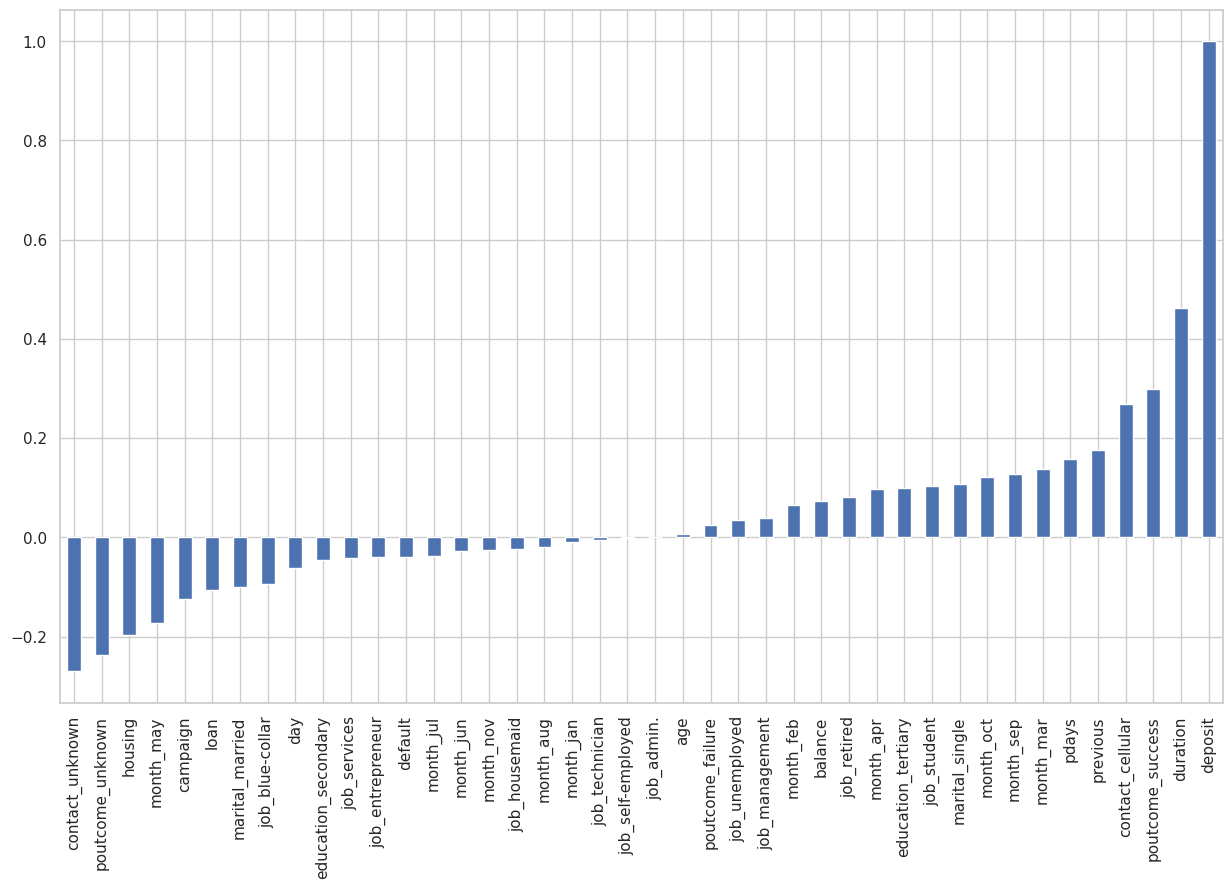

In [155]:
fig = plt.figure(figsize=(15,9))
data.corr()['deposit'].sort_values(ascending=True).plot(kind='bar')
plt.show()

# Escalabilidad de los datos

In [156]:
data.shape

(9839, 42)

In [157]:
from sklearn.preprocessing import MinMaxScaler

In [158]:
scaler = MinMaxScaler()


In [159]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])


In [160]:
data_scaled = scaler.fit_transform(numeric_data)


In [161]:
data_scaled = pd.DataFrame(data_scaled, columns=numeric_data.columns)


In [162]:
non_numeric_data = data.select_dtypes(exclude=['float64', 'int64'])
data_scaled = pd.concat([data_scaled, non_numeric_data.reset_index(drop=True)], axis=1)

In [163]:
print(data_scaled.head())


        age  default   balance  housing  loan       day  duration  campaign  \
0  0.546667      0.0  0.125034      1.0   0.0  0.133333  0.267922  0.000000   
1  0.506667      0.0  0.093769      0.0   0.0  0.133333  0.377514  0.000000   
2  0.306667      0.0  0.110435      1.0   0.0  0.133333  0.357401  0.000000   
3  0.493333      0.0  0.126844      1.0   0.0  0.133333  0.148530  0.000000   
4  0.480000      0.0  0.095660      0.0   0.0  0.133333  0.172769  0.016129   

   pdays  previous  ...  job_retired  job_self-employed  job_services  \
0    0.0       0.0  ...          0.0                0.0           0.0   
1    0.0       0.0  ...          0.0                0.0           0.0   
2    0.0       0.0  ...          0.0                0.0           0.0   
3    0.0       0.0  ...          0.0                0.0           1.0   
4    0.0       0.0  ...          0.0                0.0           0.0   

   job_student  job_technician  job_unemployed  marital_married  \
0          0.0     

In [164]:
#EDA

In [165]:
import seaborn as sns

Distribución de depositos

<ipython-input-166-b4274a2101a5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='deposit', data=data, palette='pastel')


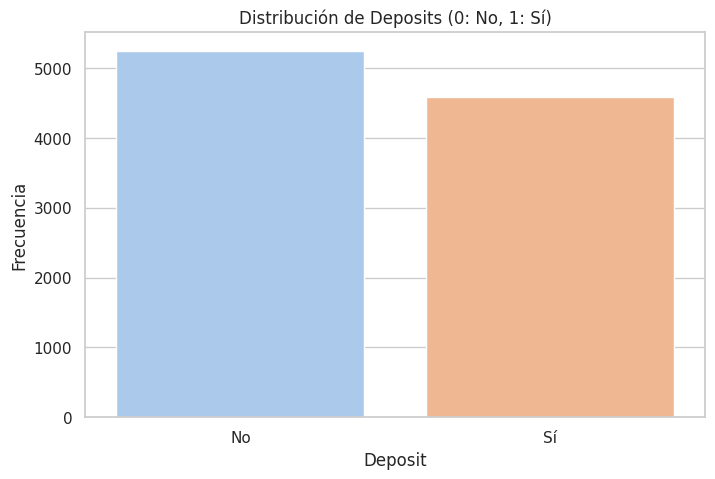

In [166]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.countplot(x='deposit', data=data, palette='pastel')
plt.title('Distribución de Deposits (0: No, 1: Sí)')
plt.xlabel('Deposit')
plt.ylabel('Frecuencia')
plt.xticks(ticks=[0, 1], labels=['No', 'Sí'])
plt.show()

#Modelo

In [207]:
data['deposit'].value_counts(normalize=True)*100

,proportion
deposit,
0,53.389572
1,46.610428


In [187]:
data_scaled.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_married,marital_single,education_secondary,education_tertiary
0,0.546667,0.0,0.125034,1.0,0.0,0.133333,0.267922,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.506667,0.0,0.093769,0.0,0.0,0.133333,0.377514,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.306667,0.0,0.110435,1.0,0.0,0.133333,0.357401,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.493333,0.0,0.126844,1.0,0.0,0.133333,0.148530,0.000000,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.480000,0.0,0.095660,0.0,0.0,0.133333,0.172769,0.016129,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [188]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


In [189]:
X= data_scaled.drop('deposit', axis=1)

In [190]:
y=data_scaled['deposit'].values

In [191]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [193]:
model= LogisticRegression()

In [194]:
result= model.fit(X_train, y_train)

In [195]:
prediction_test= model.predict(X_test)

In [197]:
print(metrics.accuracy_score(y_test,prediction_test))

0.8289295392953929


Evaluación del modelo

In [198]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


In [200]:
report = classification_report(y_test, prediction_test)
print("Informe de Clasificación:")
print(report)

Informe de Clasificación:
              precision    recall  f1-score   support

         0.0       0.82      0.87      0.84      1559
         1.0       0.84      0.78      0.81      1393

    accuracy                           0.83      2952
   macro avg       0.83      0.83      0.83      2952
weighted avg       0.83      0.83      0.83      2952



In [201]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

<Figure size 1100x1100 with 0 Axes>

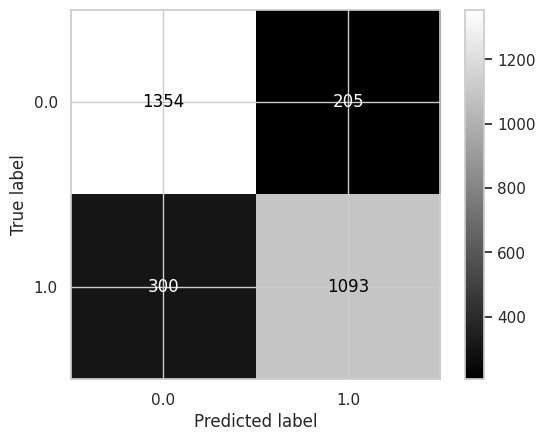

In [202]:
fig = plt.figure(figsize=(11,11))
cm = confusion_matrix(y_test, prediction_test, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=model.classes_)
disp.plot(cmap='gray')
plt.show()

In [203]:
model.coef_

array([[ 2.27703148e-02, -1.86543629e-01,  1.03456897e+00,
        -5.97345229e-01, -3.31934807e-01, -4.70131552e-02,
         1.64496197e+01, -2.37849345e+00, -5.68882247e-01,
         6.26485095e-01,  6.68470027e-01, -8.23826113e-01,
        -5.98626816e-01,  1.46446635e+00, -1.02119561e+00,
        -4.07799342e-01, -1.42102638e+00, -6.86196894e-01,
        -1.58802914e+00, -1.48521654e+00, -2.62470655e-01,
         1.36566744e+00, -1.12353359e+00, -1.39981583e+00,
         4.25484136e-01,  4.75405117e-01,  3.51395653e-03,
        -1.04930220e-01, -1.31382762e-01, -3.78342358e-01,
        -2.38190160e-01,  4.05840174e-01, -2.73272715e-01,
        -1.73421421e-01,  7.45700140e-01, -6.56790179e-02,
         5.48082987e-02, -5.17232649e-02,  2.20880090e-01,
         3.00274630e-01,  5.65522151e-01]])

In [204]:
model.feature_names_in_

array(['age', 'default', 'balance', 'housing', 'loan', 'day', 'duration',
       'campaign', 'pdays', 'previous', 'contact_cellular',
       'contact_unknown', 'poutcome_failure', 'poutcome_success',
       'poutcome_unknown', 'month_apr', 'month_aug', 'month_feb',
       'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary'], dtype=object)

Axes(0.125,0.11;0.775x0.77)


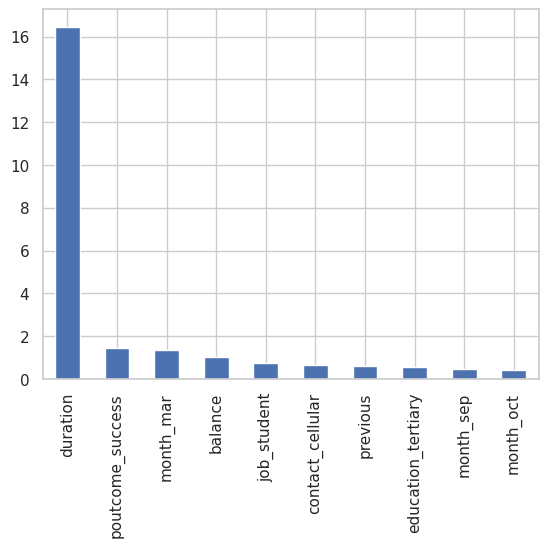

In [205]:
weights = pd.Series(model.coef_[0],
                    index=X.columns.values)
print(weights.sort_values(ascending=False)[:10].plot(kind='bar'))

Axes(0.125,0.11;0.775x0.77)


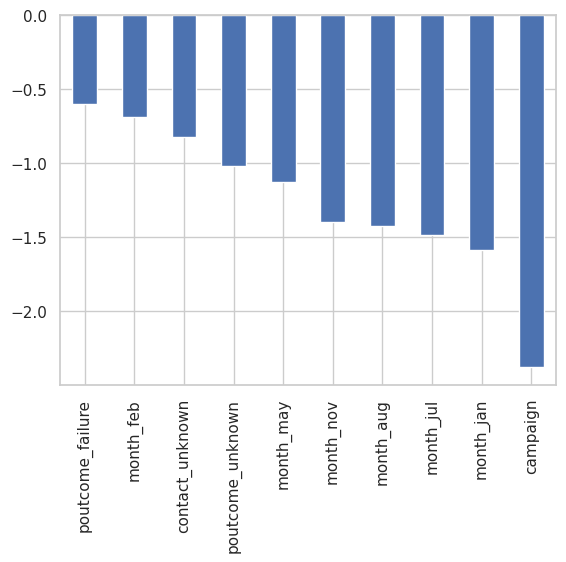

In [206]:
print(weights.sort_values(ascending=False)[-10:].plot(kind='bar'))